In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class_names=['T-shirst','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

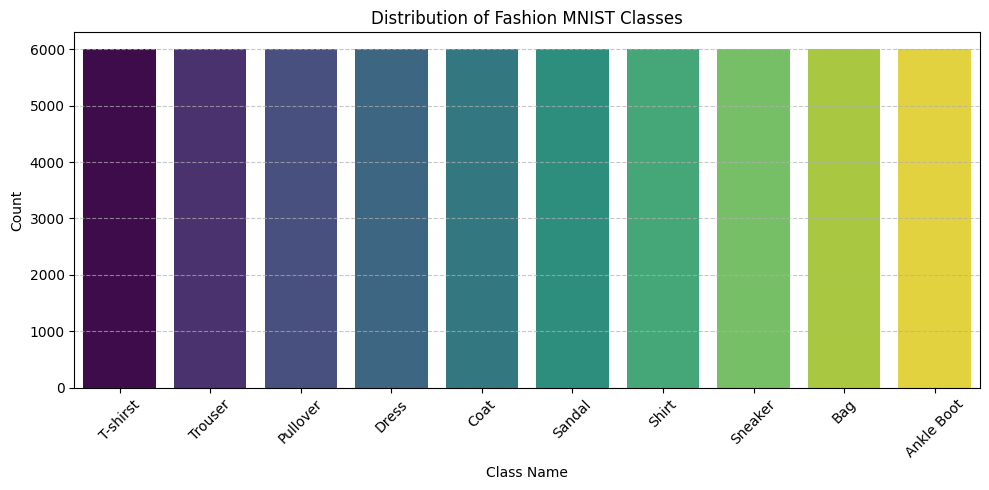

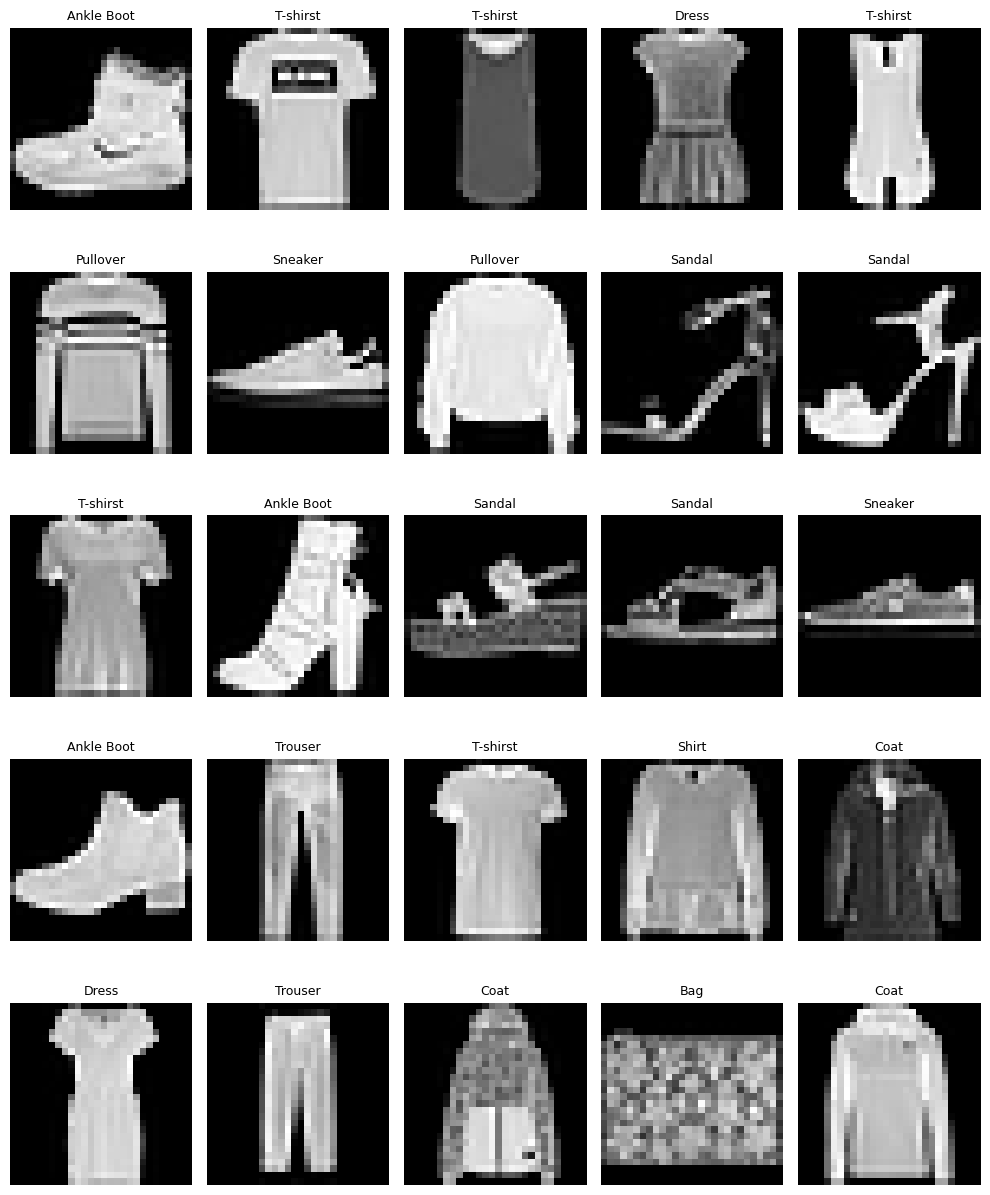

In [4]:
# Plot label distribution
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_label_distribution(train_labels, class_names)
plot_fashion_mnist(train_images,train_labels, class_names)

In [21]:
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)

In [22]:
def create_dense_model():
    initializer = tf.keras.initializers.HeNormal()

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(784,)),

        tf.keras.layers.Dense(1024, kernel_initializer=initializer,
                              kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(512, kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(256, kernel_initializer=initializer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('swish'),  # Try GELU too if needed
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model


In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)
]


In [ ]:
model = create_dense_model()
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=50,
    batch_size=64,
    callbacks=callbacks
)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.7742 - loss: 1.3303 - val_accuracy: 0.7606 - val_loss: 0.8638 - learning_rate: 0.0010
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - accuracy: 0.8351 - loss: 0.6289 - val_accuracy: 0.6973 - val_loss: 0.9133 - learning_rate: 0.0010
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.8434 - loss: 0.5437 - val_accuracy: 0.7994 - val_loss: 0.6342 - learning_rate: 0.0010
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - accuracy: 0.8473 - loss: 0.5209 - val_accuracy: 0.7227 - val_loss: 0.8541 - learning_rate: 0.0010
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.8506 - loss: 0.5071 - val_accuracy: 0.7094 - val_loss: 0.8711 - learning_rate: 0.0010
Epoch 6/50
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8526 - loss: 0.4946
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.8526 - los

In [25]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=0)
print(f"Test Accuracy: {test_acc: 4f}")

Test Accuracy:  0.904300
